# Introduction

### Import Python Modules

In [2]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Exploration

### Initial processing

In [3]:
# Load data
profiles = pd.read_csv('profiles.csv')
display(profiles.head())

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
# Check total number of entries and columns
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

### Cleaning data

Null values are present in the dataset, let's check the count for each column. Highest count of null values is seen in `offspring` column with `35561` missing values. It would not be ideal to drop rows based on this screen since over half of our dataset would be eliminated. The best step forward would be to set a replacement for each `NaN` value accordingly.

In [5]:
# Check null value count
print(profiles.isna().sum())

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64


By examining the first couple of rows, it is apparent that some of the columns contain HTMl tags and special characters. Using regex and the replace method, the elements can be eliminated for cleaner analysis.

In [6]:
# Remove HTML tags, line breaks, and other special characters
profiles.replace(r"<[^<]+?>", " ", regex=True, inplace=True)
profiles.replace(r"\n", " ", regex=True, inplace=True)
profiles.replace(r"&amp;", "&", regex=True, inplace=True)
profiles.replace(r"&rsquo;", "'", regex=True, inplace=True)
display(profiles.head(1))

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me: i would love to think that i was ...,currently working as an international agent fo...,making people laugh. ranting about a good sal...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single


### Continuous Variables

**Age**

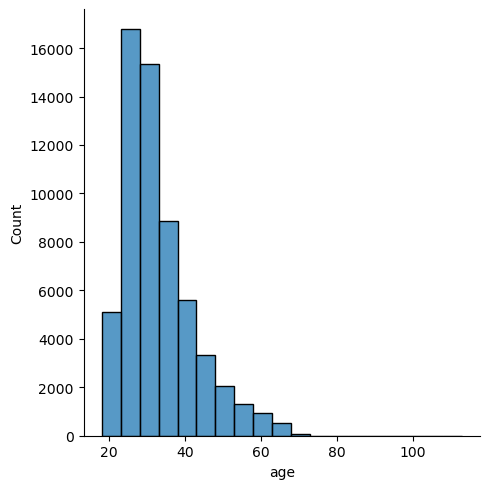

In [7]:
sns.displot(data=profiles, x='age', kind='hist', binwidth=5)

**Height**

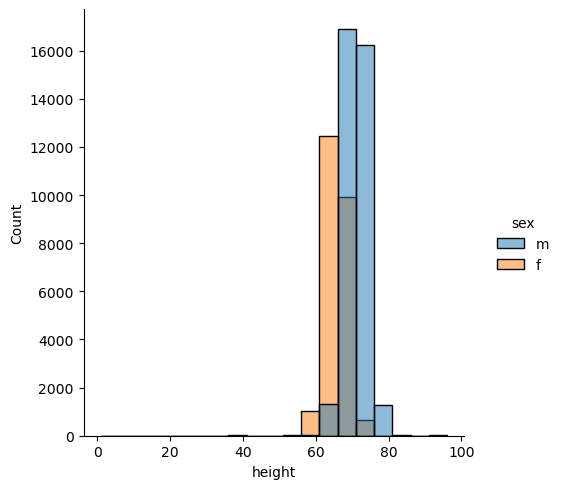

In [8]:
sns.displot(data=profiles, x='height', hue='sex', kind='hist', binwidth=5)

**Income**

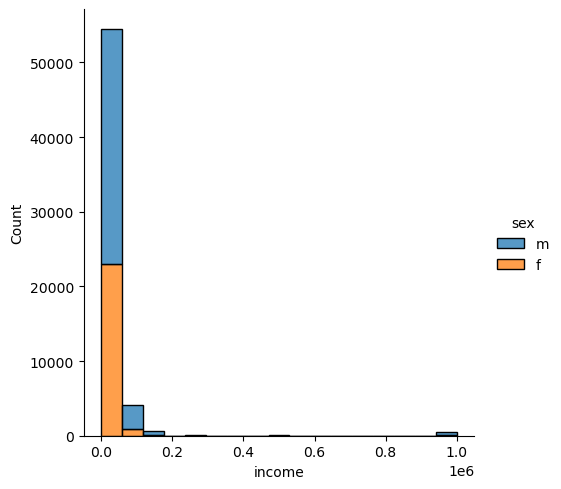

In [9]:
g = sns.displot(data=profiles, x='income', hue='sex', multiple='stack')

### Discrete Variables

**Sex**

<AxesSubplot:xlabel='count', ylabel='sex'>

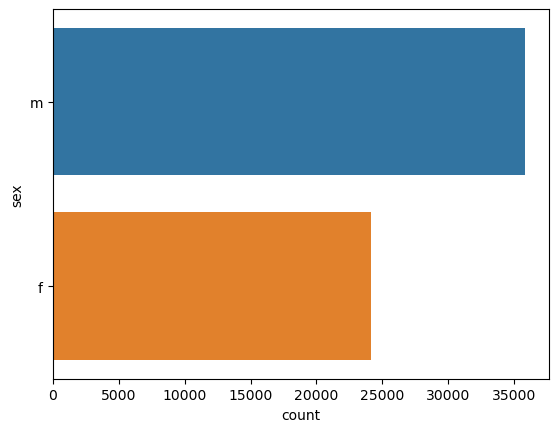

In [25]:
sns.countplot(data=profiles, y='sex', order=profiles['sex'].value_counts().index)

**Orientation**

<AxesSubplot:xlabel='count', ylabel='orientation'>

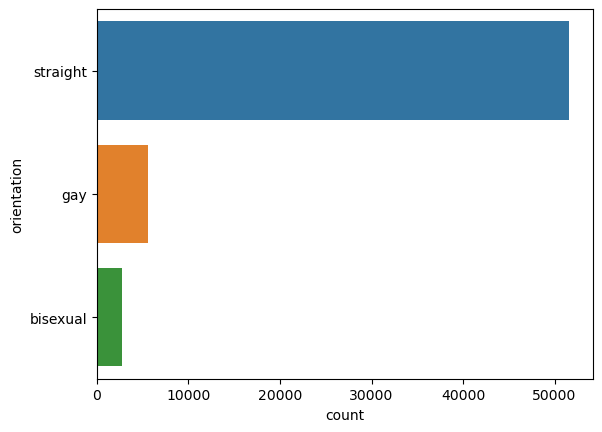

In [10]:
sns.countplot(data=profiles, y='orientation', order=profiles['orientation'].value_counts().index)

**Body Type**

<AxesSubplot:xlabel='count', ylabel='body_type'>

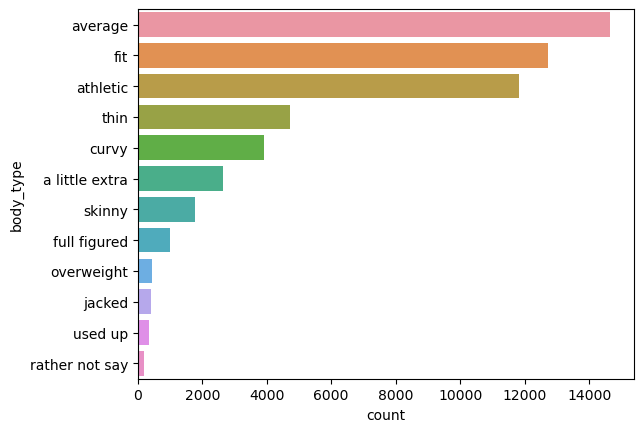

In [11]:
sns.countplot(data=profiles, y='body_type', order=profiles['body_type'].value_counts().index)

**Diet**

<AxesSubplot:xlabel='count', ylabel='diet'>

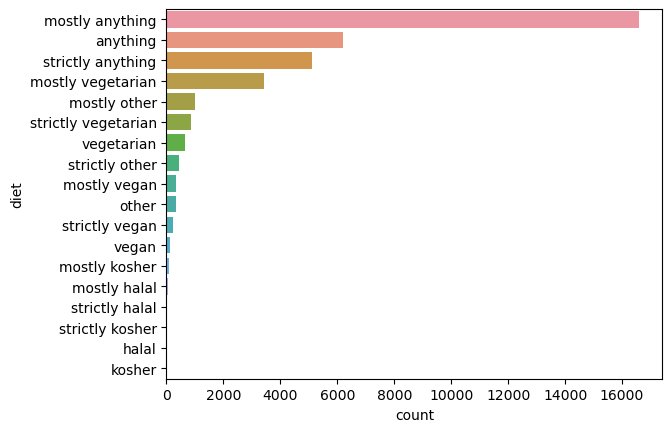

In [12]:
sns.countplot(data=profiles, y='diet', order=profiles['diet'].value_counts().index)

**Drinks**

<AxesSubplot:xlabel='count', ylabel='drinks'>

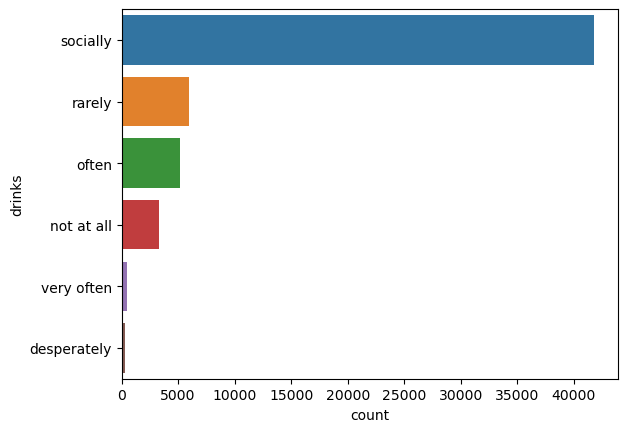

In [13]:
sns.countplot(data=profiles, y='drinks', order=profiles['drinks'].value_counts().index)

**Drugs**

<AxesSubplot:xlabel='count', ylabel='drugs'>

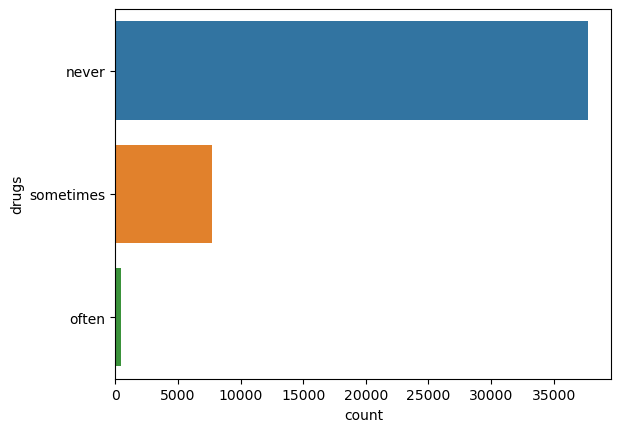

In [14]:
sns.countplot(data=profiles, y='drugs', order=profiles['drugs'].value_counts().index)

**Education**

<AxesSubplot:xlabel='count', ylabel='education'>

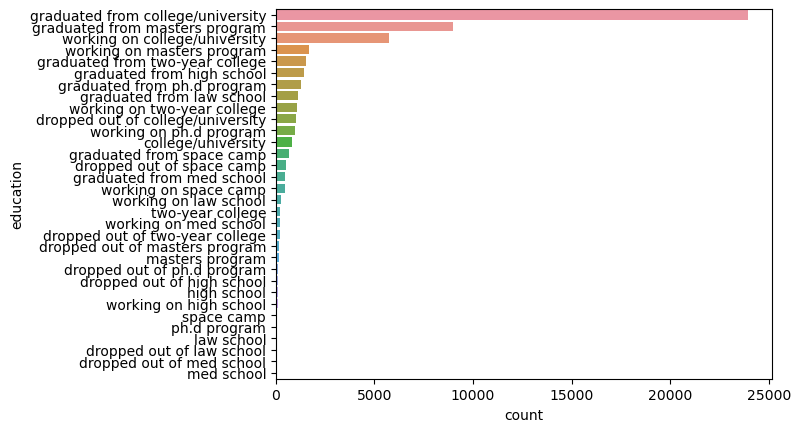

In [15]:
sns.countplot(data=profiles, y='education', order=profiles['education'].value_counts().index)

**Job**

<AxesSubplot:xlabel='count', ylabel='job'>

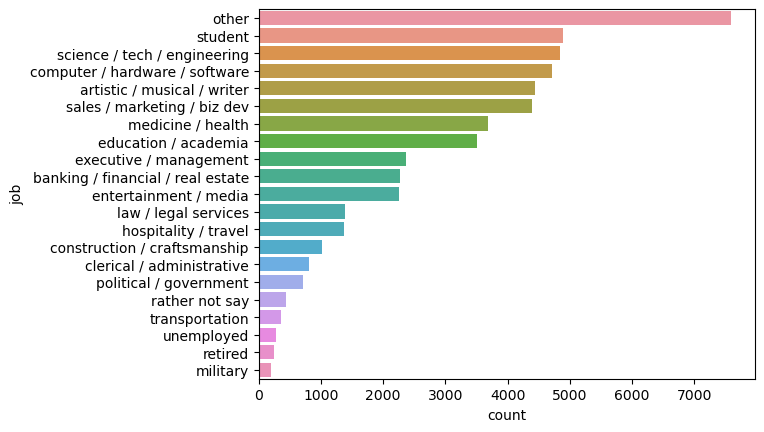

In [16]:
sns.countplot(data=profiles, y='job', order=profiles['job'].value_counts().index)

**Offspring**

<AxesSubplot:xlabel='count', ylabel='offspring'>

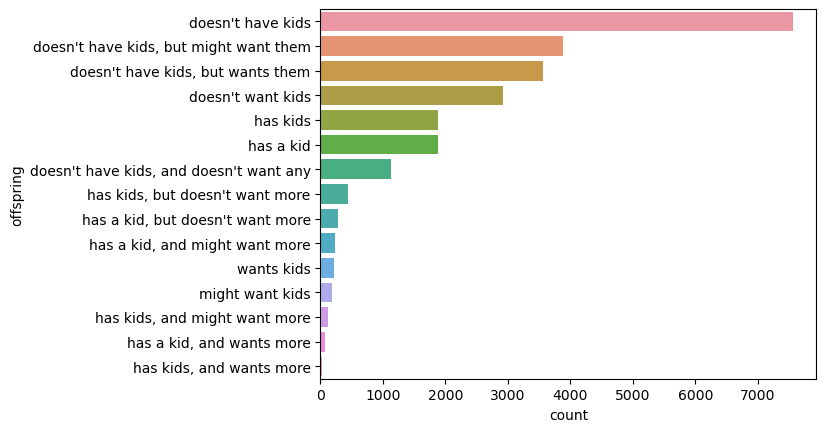

In [17]:
sns.countplot(data=profiles, y='offspring', order=profiles['offspring'].value_counts().index)

**Pets**

<AxesSubplot:xlabel='count', ylabel='pets'>

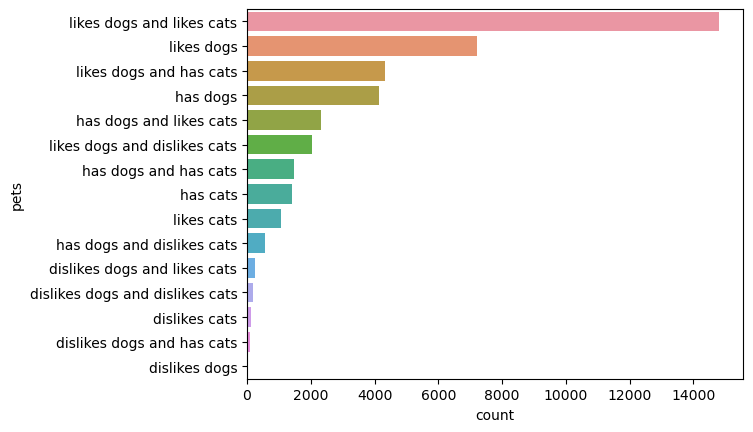

In [18]:
sns.countplot(data=profiles, y='pets', order=profiles['pets'].value_counts().index)

**Religion**

<AxesSubplot:xlabel='count', ylabel='religion'>

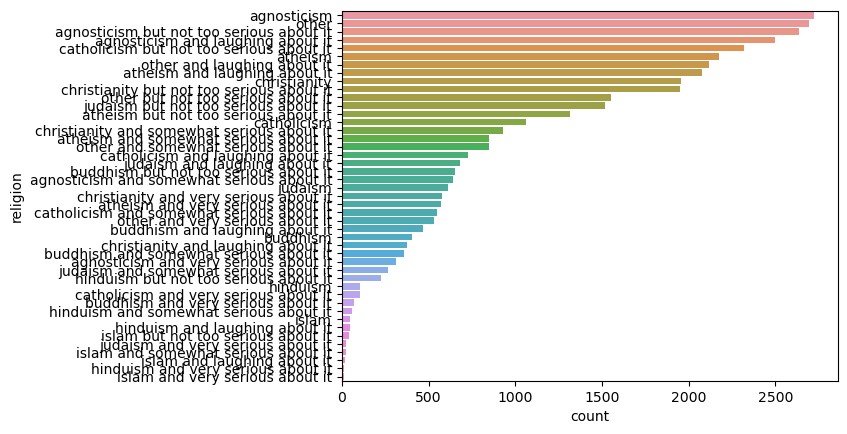

In [19]:
sns.countplot(data=profiles, y='religion', order=profiles['religion'].value_counts().index)

**Smokes**

<AxesSubplot:xlabel='count', ylabel='smokes'>

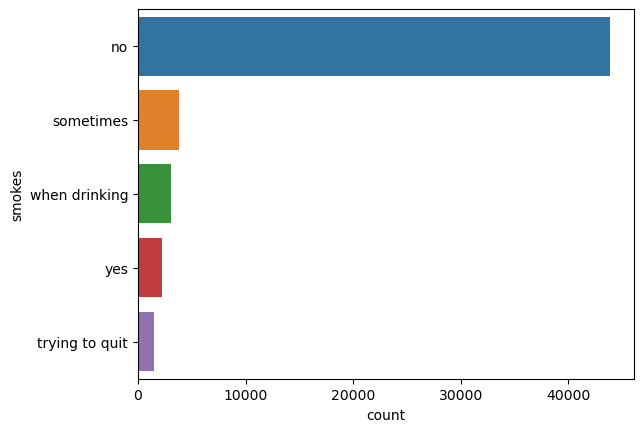

In [20]:
sns.countplot(data=profiles, y='smokes', order=profiles['smokes'].value_counts().index)

# Predictions

In [21]:
# Target 1
print(profiles.diet.nunique())
print(profiles.diet.unique())

18
['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']


# Conclusion